In [2]:
#TODO:
# Look into the rouge/bleu issues
# make side by side table of Attribute/Attribute inferred, Object/Object Inferred
#List of BLEU/ROUGE scores for all files. Make boxplots of values across files


In [3]:
# For SRL parsing (dependencies outdated)
!pip install allennlp allennlp-models
# !pip install torch==1.2.0 torchvision==0.4.0 -f

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 997.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 29.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
!pip install --upgrade joblib
!pip install --upgrade tbb
!pip install stanza
!pip install jsonlines
!pip install jiwer
!pip install spacy[transformers]
!python -m spacy download en_core_web_sm
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=963591d8e8e41a7747eb686192faeeedecc559ce975cde30e1261fba7b04d64f
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of spacy-transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# restart notebook and run following cells

In [6]:

import os, sys
import torch

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import random
np.random.seed(0)
random.seed(0)

import nltk
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize

import ast
import itertools
from tqdm import tqdm
tqdm.pandas()
import itertools
import json



import re
import stanza
stanza.download('en')
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,ner,depparse',use_gpu=True)
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english")
import string
import jiwer

import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel


from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
from sentence_transformers import SentenceTransformer, CrossEncoder, util, models
cross_encoder = CrossEncoder('cross-encoder/stsb-distilroberta-base',device=None)
entail_encoder = CrossEncoder('cross-encoder/nli-distilroberta-base',device=None)

# sentence-transformers/all-mpnet-base-v2
word_embedding_model = SentenceTransformer('flax-sentence-embeddings/stackoverflow_mpnet-base',device=None)


import math
from scipy.spatial import distance
from scipy.signal import find_peaks
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (11.7,8.27)
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

main_arguments = ['ARG' + str(idx) for idx in range(6)]
# !pip install bertopic
# from bertopic import BERTopic
# from hdbscan import HDBSCAN
# from umap import UMAP


from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| ner       | ontonotes |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [7]:
 ##extract predicate arguments
#Download AllenAI model
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/structured-prediction-srl-bert.2020.12.15.tar.gz",cuda_device=torch.cuda.current_device())
#SRL arguments of interest
arg_types = ['ARGM-GOL','ARGM-COM','ARGM-NEG','ARGM-MOD','ARGM-DIR','ARGM-LOC','ARGM-MNR','ARGM-TMP','ARGM-ADV','ARGM-PRP','ARGM-ADJ','ARGM-LVB','ARGM-CAU' ,
             'ARGM-PNC','ARGM-EXT','ARGM-REC','ARGM-PRD','ARGM-DIS','ARGM-DSP','ARGM-RLC','ARG0','ARG1','ARG2','ARG3','ARG4','ARG5','ARG6','V']
predictor._model = predictor._model.cuda()

#pass list of sentences as [{'sentence':...},{'sentence':...}]
def srl_arg(sentences):
  # string = string.lower()
  parsed = predictor.predict_batch_json(
      sentences
  )
  outcome = dict()
  for sentence,parse in zip(sentences,parsed):
    sentence = sentence['sentence']
    verb_list = []
    for elem in parse['verbs']:
      parsed_items = dict()
      for item in arg_types:
        arg_found = re.findall("\[{}: (.*?)]".format(item), elem['description'])
        if len(arg_found) : parsed_items[item] = arg_found
      if bool(parsed_items): verb_list.append(parsed_items)
    outcome[sentence] = verb_list
  return outcome

srl_arg([{'sentence' :"In order to graduate you need to make sure you are ready and meet the requirements imposed on apache projects on time."}])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'In order to graduate you need to make sure you are ready and meet the requirements imposed on apache projects on time.': [{'ARG0': ['you'],
   'V': ['graduate']},
  {'ARGM-PRP': ['In order to graduate'],
   'ARG0': ['you'],
   'ARG1': ['to make sure you are ready and meet the requirements imposed on apache projects on time'],
   'V': ['need']},
  {'ARG0': ['you'],
   'ARG1': ['sure you are ready and meet the requirements imposed on apache projects on time'],
   'V': ['make']},
  {'ARG1': ['you'], 'ARG2': ['ready'], 'V': ['are']},
  {'ARG0': ['you'],
   'ARG1': ['the requirements imposed on apache projects on time'],
   'V': ['meet']},
  {'ARGM-TMP': ['on time'],
   'ARG1': ['the requirements'],
   'ARG2': ['on apache projects'],
   'V': ['imposed']}]}

In [8]:
#read emails
def parse2rule(text_surr,parsed):
  phrases, order = [],[]

  try: parsed['V']
  except: return
  # check for coresets (ARG-1/ARG-0)
  if any(elem in main_arguments for elem in list(parsed.keys())):
    # print(valid)
    for k in arg_types:

      try: args = parsed[k]
      except: continue
      for v in args:
        # search argument position in original sentence

        query = "".join([elem for elem in v.lower() if elem.isalpha()])
        # print(text_surr,query)
        found = [m.start() for m in re.finditer(query,text_surr)]
        if found:
          try: found_ = [elem for elem in found if elem in range(min(order),max(order))][0]
          except: found_ = found[0]
          order.append(found_);phrases.append(v)

    # rearrange in relative order
    constructed = [x for _,x in sorted(zip(order,phrases))]
    return " ".join(constructed)


In [9]:
# text stats

from datetime import datetime

def convert_time(x):
  try:
    datetime.strptime(x.split()[0], '%Y-%m-%d')
    return datetime.fromisoformat(x.split()[0])
  except: return np.nan

##identify communicator roles in email

def process_(text):
  text = text.replace("\r\n"," ").replace("\n"," ")
  text = re.sub('podling', 'project', text,flags=re.IGNORECASE)
  regex = r'\b(\w+)(?:\W+\1\b)+'
  text = re.sub(regex, r'\1', text, flags=re.IGNORECASE)
  return text.lower()

def create_clauses(x):
  clauses = []
  # all frames parsed in a sentence
  for key,item in x['srl_parsed'].items():

    # verb frames per sentence
    text = "".join([elem for elem in key.lower() if elem.isalpha()])

    # No of non-overlapping valid frames
    verb_toks = item.copy()

    for parsed in item:
      try: action = parsed['V'][0].lower().strip()
      except: continue

      flag = False
      for parsed_ in item:
        if parsed_ != parsed:
          for k,v in parsed_.items():
            if any(action in argument.lower().split() and k != 'V' for argument in v):
              try: verb_toks.remove(parsed);flag=True
              except: pass
        if flag : break

    if item and not verb_toks: verb_toks = item.copy()

    flag = False
    # parse every verb frame per sentence
    for parsed in verb_toks:
      parsed = {k:[v] if not isinstance(v,list) else v for k,v in parsed.items()}
      rule = parse2rule(text,parsed)
      if rule : clauses.append(rule);flag = True
    # if not flag : clauses.append(key)

  # remove overlapping clauses
  all_clauses = []
  for clause in clauses:
    if all(clause not in elem or clause == elem for elem in clauses) : all_clauses.append(clause)
  return all_clauses





In [10]:
# Generate rules from policies
try: f = open("/content/anamika_os.csv")
except:
  os.system('wget https://storage.googleapis.com/cscw_2022/anamika_os.csv')
data = pd.read_csv("/content/anamika_os.csv");print(data.columns)

data['sentences'] = data['policy.statement'].apply(lambda x : [sentence.text for sentence in nlp(x).sentences])
data['srl_ip'] = data['sentences'].apply(lambda x : [{'sentence' : elem} for elem in x])
data['srl_parsed'] = data['srl_ip'].apply(lambda x: srl_arg(x))
data['parsed_clauses'] = data.apply(lambda x : create_clauses(x),axis=1)
data.to_csv('asf_clauses.csv')

Index(['policy.doc.name', 'section.name', 'policy.statement'], dtype='object')


In [11]:
rules_data = pd.read_csv('asf_clauses.csv')
rules_data['parsed_clauses'] = rules_data['parsed_clauses'].apply(lambda x: ast.literal_eval(x))
rules_data['label'] = rules_data.index.tolist()
rules_data = rules_data.explode('parsed_clauses')
rules_data.dropna(inplace=True);print('All parsed rules: ', rules_data.shape[0])
rules = rules_data['parsed_clauses'].tolist()
rules = list(map(lambda x : process_(x),rules))

All parsed rules:  423


In [ ]:
# data = pd.read_csv("NationalOrganicProgramRegulations_Siddiki.xlsx - Econ Development Mechanisms.csv")
# print(data.columns)
# data['sentences'] = data['Raw Institutional Statement'].apply(lambda x : [sentence.text if type(sentence.text)==str else "" for sentence in nlp(x).sentences])
# data['srl_ip'] = data['sentences'].apply(lambda x : [{'sentence' : elem} for elem in x])
# data['srl_parsed'] = data['srl_ip'].apply(lambda x: srl_arg(x))
# data['parsed_clauses'] = data.apply(lambda x : create_clauses(x),axis=1)
# data.to_csv('asfp_clauses.csv')
# rules_data = pd.read_csv('asfp_clauses.csv')
# rules_data['parsed_clauses'] = rules_data['parsed_clauses'].apply(lambda x: ast.literal_eval(x))
# rules_data['label'] = rules_data.index.tolist()
# rules_data = rules_data.explode('parsed_clauses')
# rules_data.dropna(inplace=True);print('All parsed rules: ', rules_data.shape[0])
# rules = rules_data['parsed_clauses'].tolist()
# rules = list(map(lambda x : process_(x),rules))


In [ ]:
# [type(sentence.text) for sentence in nlp(data['Raw Institutional Statement'][17]).sentences]

In [13]:
# data['Raw Institutional Statement'][17]

In [14]:
data = pd.read_csv("FPC_Siddiki.xlsx - Camden Food Security.csv");print(data.columns)

data.dropna(subset=['aIm'],inplace=True)
data.fillna('', inplace=True)

data['sentences'] = data['Raw Institutional Statement'].apply(lambda x : [sentence.text for sentence in nlp(x).sentences])
data = data.explode('sentences')

#find root verb through stanza
data['ROOT'] = data['sentences'].apply(lambda x : [word.text for sent in nlp(x).sentences for word in sent.words  if word.deprel == 'root'][0])

data['srl_ip'] = data['sentences'].apply(lambda x : [{'sentence' : x}])
data['srl_parsed'] = data.apply(lambda x: srl_arg(x['srl_ip'])[x['sentences']],axis=1)
data = data.explode('srl_parsed')
print(data['srl_parsed'].head())




def argmatch(x,arg):
  if arg == 'Attribute_inf':
    #attribute usually found in ARG0 or ARG1
    if 'ARG0' in list(x.keys()) : return " ".join(x['ARG0'])
    elif 'ARG1' in list(x.keys()) : return " ".join(x['ARG1'])
    else: return ""


  if arg == 'Object_inf':
    #attribute usually found in ARG0 or ARG1
    if 'ARG0' in list(x.keys()):
      if 'ARG1' in list(x.keys()) : return " ".join(x['ARG1'])
      elif 'ARG2' in list(x.keys()) : return " ".join(x['ARG2'])
      else: return ""

    else:
      if 'ARG2' in list(x.keys()) : return " ".join(x['ARG2'])
      else: return ""

  if arg == 'Aim_inf': return " ".join(x['V'])


  if arg == 'Deontic_inf':
      if 'ARGM-MOD' in list(x.keys()) : return " ".join(x['ARGM-MOD'])
      else: return ""

data.dropna(subset=['srl_parsed'],inplace=True)
for arg in ['Attribute_inf','Object_inf','Aim_inf','Deontic_inf']:
  data[arg] = data['srl_parsed'].apply( lambda x : argmatch(x,arg))




data.columns = map(str.lower, data.columns)
column_names = ['attribute', 'object', 'deontic', 'aim']
for col_name in column_names:
    pattern = r'\[[^\]]*\]'
    data[col_name] = data[col_name].apply(lambda x : re.sub("[\(\[].*?[\)\]]", "",x))
    data[col_name] = data[col_name].apply(lambda x : x.lower().strip())

#only keep frame parsed for root verbs
data = data[(data['root'] == data['aim_inf']) & (data['root'] != '')]
data = data[['raw institutional statement','attribute','deontic','aim','object','attribute_inf','deontic_inf','aim_inf','object_inf']]
data.to_csv('data_new.csv',index=False); print(data.shape); print(data.head())

Index(['Raw Institutional Statement', 'Attribute', 'Deontic', 'aIm', 'oBject',
       'Condition', 'Or else', 'Statement Type', 'Institution Type',
       'Regulative /            Constitutive', 'Level of Analysis'],
      dtype='object')
1                                     {'V': ['shall']}
1                                        {'V': ['be']}
1    {'ARGM-MOD': ['shall'], 'ARG1': ['The voting m...
2                                     {'V': ['shall']}
2                                        {'V': ['be']}
Name: srl_parsed, dtype: object
(15, 9)
                         raw institutional statement  \
1  The voting members of the Board shall be compr...   
2  The nonvoting members of the Board shall be co...   
3    The Board shall consist of five voting members…   
4  ...who shall be appointed by a majority vote o...   
5  The City Council shall select the members of t...   

                        attribute deontic              aim  \
1     voting members of the board   shall  be c

In [15]:
data.head()


,raw institutional statement,attribute,deontic,aim,object,attribute_inf,deontic_inf,aim_inf,object_inf
1,The voting members of the Board shall be compr...,voting members of the board,shall,be comprised of,residents and former residents of the city of ...,The voting members of the Board,shall,comprised,of residents and former residents of the City ...
2,The nonvoting members of the Board shall be co...,nonvoting members of the board,shall,be comprised of,employees and officials of the city of camden ...,The nonvoting members of the Board,shall,comprised,of employees and officials of the City of Camd...
3,The Board shall consist of five voting members…,board,shall,consist of,five voting members,The Board,shall,consist,of five voting members …
4,...who shall be appointed by a majority vote o...,,shall,be appointed,,by a majority vote of the City Council of the ...,shall,appointed,who
5,The City Council shall select the members of t...,city council,shall,select,the members of the board,The City Council,shall,select,the members of the Board


In [16]:
from nltk.translate.bleu_score import sentence_bleu
# ref = [
#     'In order to graduate you need to make sure you are ready and meet the requirements imposed on apache projects on time.'.split(),
#     "Good Morning Graduates".split()
# ]
# test = 'In order to graduate you need to make sure you are ready and meet the requirements imposed on apache projects on time.'.split()
# print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

# test01 = "Good Morning Graduates".split()
# print('BLEU score for test01-> {}'.format(sentence_bleu(ref, test01)))


In [20]:
!pip install evaluate
!pip install rouge-score
import evaluate
rouge = evaluate.load('rouge')
# predictions = ["In order to graduate you need to make sure you are ready and meet the requirements imposed on apache projects on time.",
#                "Good Morning", "I am waiting for the new graduates to get their degrees"]
# references = [
#               ["In order to graduate you need to make sure you are ready and meet the requirements imposed on apache projects on time.",
#                "UC Davis has got one of the best graduates"],
#               ["Good Morning Graduates", "Morning Graduates"],
#               ["People are eagerly waiting for new graduates",
#                "People are very excited about new Graduates"]

# ]
# results = rouge.compute(predictions=predictions, references=references)
# print(results)



In [23]:
# these functions are heavily influenced by the HF squad_metrics.py script
def normalize_text(s):
    """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps."""
    import string, re

    def remove_articles(text):
        regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
        return re.sub(regex, " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc((s))))

def compute_exact_match(prediction, truth):
    return int(normalize_text(prediction) == normalize_text(truth))

def compute_f1(prediction, truth):
    pred_tokens = normalize_text(prediction).split()
    truth_tokens = normalize_text(truth).split()

    # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
    if len(pred_tokens) == 0 or len(truth_tokens) == 0:
        return int(pred_tokens == truth_tokens)

    common_tokens = set(pred_tokens) & set(truth_tokens)

    # if there are no common tokens then f1 = 0
    if len(common_tokens) == 0:
        return 0

    prec = len(common_tokens) / len(pred_tokens)
    rec = len(common_tokens) / len(truth_tokens)

    return 2 * (prec * rec) / (prec + rec)


In [32]:
import pandas as pd
import re
from nltk.translate.bleu_score import sentence_bleu
# from nltk.translate.rouge import Rouge

df1 = pd.read_csv('data_new.csv')
df1.columns = map(str.lower, df1.columns)

column_names = ['attribute', 'object', 'deontic', 'aim']

bleu_scorer = sentence_bleu

for col_name in column_names:
    # pattern = r'\[[^\]]*\]'
    # df1[col_name] = df1[col_name].apply(lambda x : re.sub("[\(\[].*?[\)\]]", "",x))

    values1 = df1[col_name].tolist()
    values2 = df1[col_name + '_inf'].tolist()

    values1 = [str(x).replace('nan', '') for x in values1]
    values2 = [str(x).replace('nan', '') for x in values2]


    rouge_scores = rouge.compute(predictions = values2, references = values1)
    print(rouge_scores)

    bleu_score = sentence_bleu([values1], values2)
    print(f'BLEU score for {col_name}: {bleu_score:.2f}')

    f1_score = max(compute_f1(values, values1) for values in values2)
    print(f" F1 score for {col_name}: {f1_score}")

{'rouge1': 0.5134343434343435, 'rouge2': 0.2074074074074074, 'rougeL': 0.5164646464646465, 'rougeLsum': 0.5162626262626263}
BLEU score for attribute: 0.00
 F1 score for attribute: 0.3157894736842105
{'rouge1': 0.47647072226019593, 'rouge2': 0.4330465622941684, 'rougeL': 0.4799605073289284, 'rougeLsum': 0.48310498468393204}
BLEU score for object: 0.00
 F1 score for object: 0.32432432432432434
{'rouge1': 1.0, 'rouge2': 0.0, 'rougeL': 1.0, 'rougeLsum': 1.0}
BLEU score for deontic: 1.00
 F1 score for deontic: 0
{'rouge1': 0.711111111111111, 'rouge2': 0.0, 'rougeL': 0.7222222222222221, 'rougeLsum': 0.711111111111111}
BLEU score for aim: 0.17
 F1 score for aim: 0.15384615384615385


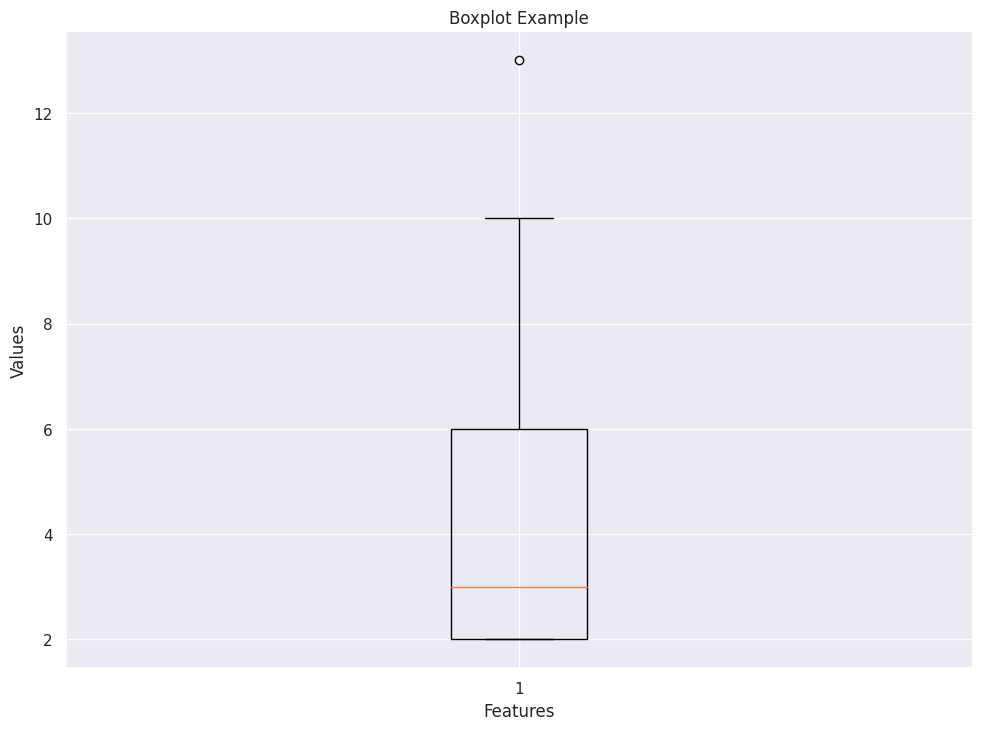

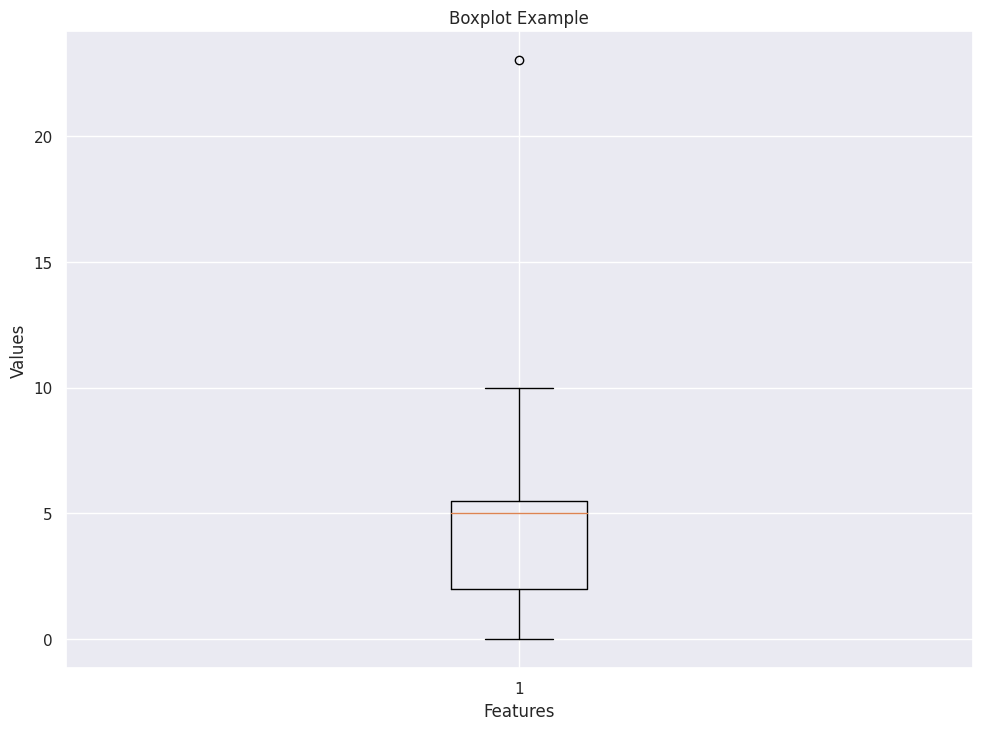

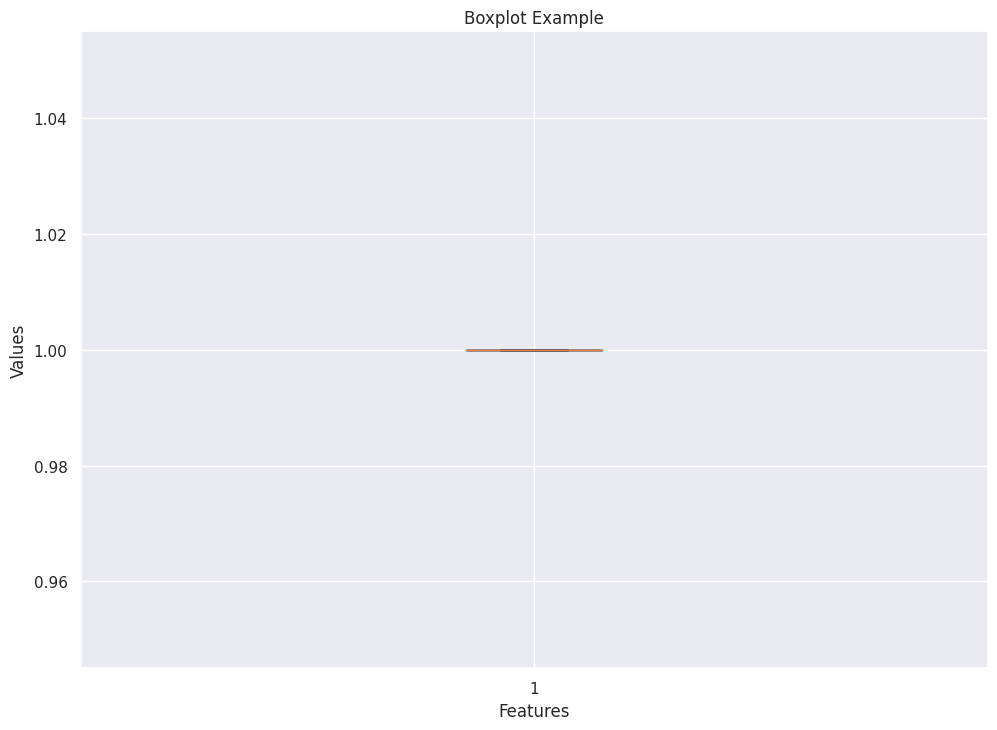

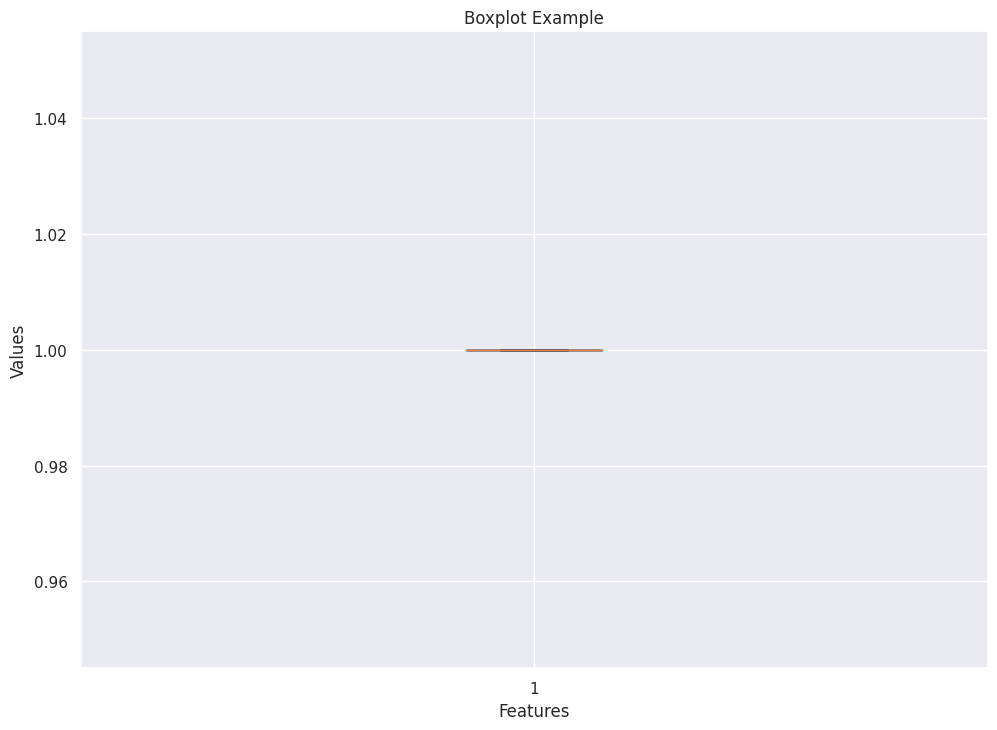

In [38]:
import matplotlib.pyplot as plt
for col_name in column_names:
    # pattern = r'\[[^\]]*\]'
    # df1[col_name] = df1[col_name].apply(lambda x : re.sub("[\(\[].*?[\)\]]", "",x))

    values1 = df1[col_name].tolist()
    values2 = df1[col_name + '_inf'].tolist()

    values1 = [str(x).replace('nan', '') for x in values1]
    values2 = [str(x).replace('nan', '') for x in values2]
    # Sample data
    data = values2
    numerical_data = [[len(text.split()) for text in data]]
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a boxplot
    ax.boxplot(numerical_data)

    # Set labels and title
    ax.set_xlabel('Features')
    ax.set_ylabel('Values')
    ax.set_title('Boxplot Example')

    # Show the plot
    plt.show()
